In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Importing and reshaping

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Quadratic Intensity scaling

In [4]:
X_train = np.array(255*(X_train / 255) **2)
X_test = np.array(255*(X_test / 255) **2)

In [5]:
Y_train = keras.utils.np_utils.to_categorical(y_train, 10)
Y_test = keras.utils.np_utils.to_categorical(y_test, 10)
print(Y_train.shape)
print(Y_train.shape)

(60000, 10)
(60000, 10)


Splitting into train and validation

In [6]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(54000, 28, 28, 1) (6000, 28, 28, 1) (54000, 10) (6000, 10)


Model

In [7]:
model = keras.models.Sequential()
#Layer 1
#Convolution
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(keras.layers.Activation("relu"))

#Layer 2
#Convolution
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(keras.layers.Activation("relu"))
#max pool
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

#layer 3
#Convolution
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(keras.layers.Activation("relu"))

#layer 4
#convolution
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(keras.layers.Activation("relu"))
#max pool
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))


#FC layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256))
model.add(keras.layers.Activation("relu"))

#output layer
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0

Compiling model

In [9]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])

Data augmentation

In [10]:
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=0.1,
                             horizontal_flip = True,
                             zoom_range = 0.1, 
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             fill_mode='nearest')
datagen.fit(X_train)

Fit model

In [11]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    shuffle=True,
                    epochs=32, 
                    validation_data = (x_val, y_val),
                    verbose = 2, 
                    steps_per_epoch = x_train.shape[0] // 32)

Epoch 1/32
1687/1687 - 57s - loss: 0.7833 - accuracy: 0.7250 - val_loss: 0.5580 - val_accuracy: 0.7867
Epoch 2/32
1687/1687 - 28s - loss: 0.5132 - accuracy: 0.8098 - val_loss: 0.4969 - val_accuracy: 0.8185
Epoch 3/32
1687/1687 - 28s - loss: 0.4488 - accuracy: 0.8324 - val_loss: 0.3715 - val_accuracy: 0.8580
Epoch 4/32
1687/1687 - 27s - loss: 0.4122 - accuracy: 0.8465 - val_loss: 0.3397 - val_accuracy: 0.8792
Epoch 5/32
1687/1687 - 27s - loss: 0.3909 - accuracy: 0.8541 - val_loss: 0.3442 - val_accuracy: 0.8737
Epoch 6/32
1687/1687 - 28s - loss: 0.3790 - accuracy: 0.8601 - val_loss: 0.3564 - val_accuracy: 0.8733
Epoch 7/32
1687/1687 - 27s - loss: 0.3639 - accuracy: 0.8657 - val_loss: 0.3133 - val_accuracy: 0.8857
Epoch 8/32
1687/1687 - 27s - loss: 0.3581 - accuracy: 0.8678 - val_loss: 0.3083 - val_accuracy: 0.8910
Epoch 9/32
1687/1687 - 28s - loss: 0.3466 - accuracy: 0.8720 - val_loss: 0.3060 - val_accuracy: 0.8852
Epoch 10/32
1687/1687 - 27s - loss: 0.3410 - accuracy: 0.8717 - val_loss:

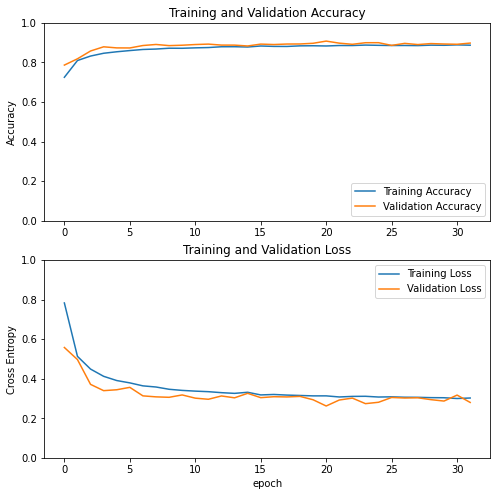

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [14]:
print('Train accuracy: ',history.history['accuracy'][-1])
print('Validation accuracy: ',history.history['val_accuracy'][-1])

score = model.evaluate(X_test,Y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Train accuracy:  0.8873035907745361
Validation accuracy:  0.8980000019073486
Test Loss: 0.30435997247695923
Test Accuracy: 0.8910999894142151
